In [14]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from OnlineEM_SLAM.data_generation import *
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (10,10)
np.random.seed(1234)

In [15]:
x = np.array([1,1, np.pi/2])
x_1 = f_paper(x, np.array([1, np.pi/2]))

In [16]:
# Instructions débiles
u = np.ones((100,2))*2
u[0:20,1] = np.pi/10
u[20:50] = -np.pi/15
u[50:100] = np.pi/8

In [17]:
path = generate_path(u, f_paper, np.diag([0.5**2, np.pi/60]))
landmarks = generate_landmarks(10, map_shape=(15,15))

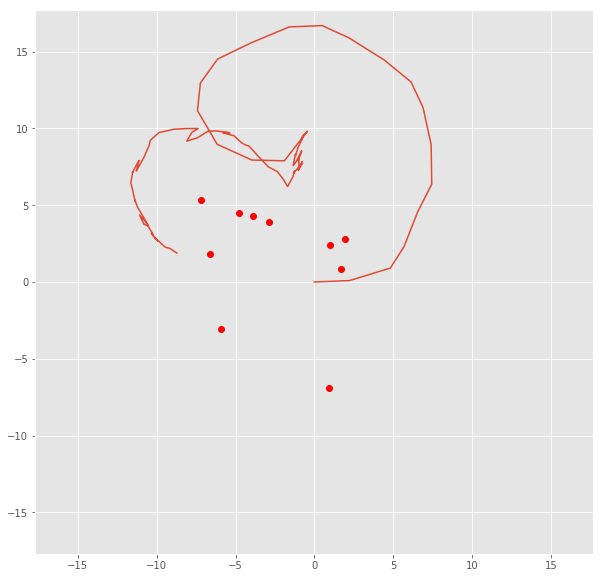

In [18]:
plt.plot(path[: , 0], path[:, 1], landmarks[:, 0], landmarks[:, 1], 'ro')
plt.xlim(-np.abs(path).max() - 1 , np.abs(path).max() + 1)
plt.ylim(-np.abs(path).max() - 1, np.abs(path).max() + 1)
plt.show()

TypeError: 'ABCMeta' object is not subscriptable